In [1]:
my_file = open("train.csv", "r")
content = my_file.read()
content_list= content.split("\n")
my_file.close()
Label_array=[]
for i in range(3750):
    content_list_array = content_list[i+1].split(",")
    if(content_list_array[1]=="1" or content_list_array[1]=="2" or content_list_array[1]=="3" ):
        Label_array.append(content_list_array[1])
        i+=1

#print(Label_array)
#print(len(Label_array))
Imgs_array=[]
for i in range(3750):
    content_list_array = content_list[i+1].split(",")
    if(content_list_array[1]=="1" or content_list_array[1]=="2" or content_list_array[1]=="3" ):
        Imgs_array.append(content_list_array[0])
        i+=1
print(Imgs_array)
print(len(Imgs_array))

['10003.jpg', '10004.jpg', '10005.jpg', '10016.jpg', '10017.jpg', '10019.jpg', '10021.jpg', '10026.jpg', '10028.jpg', '10043.jpg', '10046.jpg', '10055.jpg', '10059.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10066.jpg', '10067.jpg', '10069.jpg', '10070.jpg', '10073.jpg', '10074.jpg', '10075.jpg', '10076.jpg', '10078.jpg', '10080.jpg', '10081.jpg', '10082.jpg', '10086.jpg', '10087.jpg', '10088.jpg', '10089.jpg', '10093.jpg', '10095.jpg', '10097.jpg', '10100.jpg', '10102.jpg', '10103.jpg', '10104.jpg', '10122.jpg', '10123.jpg', '10133.jpg', '10134.jpg', '10143.jpg', '10144.jpg', '10145.jpg', '10148.jpg', '10150.jpg', '10153.jpg', '10155.jpg', '10169.jpg', '10175.jpg', '10176.jpg', '10180.jpg', '10186.jpg', '10187.jpg', '10192.jpg', '10193.jpg', '10199.jpg', '10200.jpg', '10203.jpg', '10204.jpg', '10205.jpg', '10207.jpg', '10213.jpg', '10228.jpg', '10229.jpg', '10230.jpg', '10231.jpg', '10232.jpg', '10234.jpg', '10237.jpg', '10239.jpg', '10240.jpg', '10242.jpg', '10244.jpg'

In [2]:
# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# Persons to use for generation are at:
# image_detector/images/Person_X.jpg


# creating image objects
for i in range(1533):
    img_data = []
    im = Image.open("black_background256.png")
    px = im.load()
    num_objects = random.randint(0, 10)
    #for j in range(num_objects):
   # print(ab[0])
    P= Image.open(('PeopleImg/'+Imgs_array[i]))
    C= P.resize((300,300), Image.ANTIALIAS)
    im.paste(C, (0,0))
    for a in range(0, 256):
        row_data = []
        for b in range(0, 256):
            row_data.append(px[b,a][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(Label_array[i]))
    img_array.append(im)
    #display(im)

1533


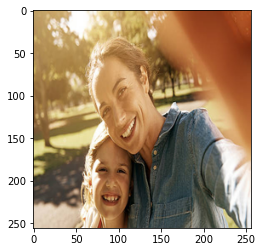

[[82, 81, 73, 72, 70, 89, 95, 109, 108, 75, 88, 150, 125, 157, 219, 205, 200, 200, 177, 182, 190, 171, 156, 141, 133, 145, 153, 145, 119, 108, 116, 108, 86, 88, 89, 108, 70, 47, 45, 51, 57, 51, 68, 53, 55, 60, 69, 62, 59, 61, 69, 88, 93, 105, 96, 95, 81, 91, 97, 95, 95, 99, 104, 109, 125, 128, 126, 128, 139, 147, 140, 145, 138, 143, 124, 112, 105, 96, 97, 93, 81, 67, 52, 58, 59, 64, 72, 76, 116, 148, 181, 195, 167, 195, 214, 234, 236, 246, 248, 207, 156, 198, 236, 150, 156, 163, 155, 169, 163, 199, 216, 206, 217, 233, 251, 249, 253, 234, 212, 241, 255, 250, 249, 255, 218, 123, 117, 101, 152, 226, 203, 178, 166, 152, 122, 101, 132, 143, 153, 188, 194, 161, 137, 185, 250, 250, 253, 255, 253, 253, 251, 250, 240, 241, 242, 235, 231, 238, 238, 238, 232, 236, 235, 237, 239, 241, 238, 235, 239, 239, 243, 237, 232, 234, 235, 228, 236, 228, 232, 228, 219, 222, 229, 219, 212, 204, 186, 152, 136, 145, 157, 156, 157, 183, 151, 159, 152, 156, 177, 190, 160, 160, 201, 226, 216, 219, 212, 220, 180, 1

In [3]:
import matplotlib.pyplot as plt
print(len(X))

plt.imshow(img_array[55])
plt.show()

#print(Y)
print(X[0])

In [4]:
from sklearn.utils import shuffle
Z = []
for i in range(len(X)):
    img_data = []
    for a in range(0, 256):        
        for b in range(0, 256):
            img_data.append(X[i][b][a])
    Z.append(img_data)
X = Z
# shuffle the images:
X, y = shuffle(X, Y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestClassifier()


RandomForestClassifier(n_estimators=10, n_jobs=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.525974025974026


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly
array3=[]
Xx=[]
for c in range(1533):
    img_array[c].save("temp.png", format="PNG")
    image = cv2.imread("temp.png")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    box, label, count = cv.detect_common_objects(image)
    output = draw_bbox(gray, box, label, count)
   # plt.imshow(output)
   # plt.show()
    array3.append(str(label.count('person')))
    print(c , " - ", "Number of people in this image are " +str(label.count('person')))
    Xx.append(X[c])
    
#print(Xx)
print(array3) 

0  -  Number of people in this image are 1
1  -  Number of people in this image are 3
2  -  Number of people in this image are 3
3  -  Number of people in this image are 1
4  -  Number of people in this image are 3
5  -  Number of people in this image are 1
6  -  Number of people in this image are 2
7  -  Number of people in this image are 1
8  -  Number of people in this image are 4
9  -  Number of people in this image are 2
10  -  Number of people in this image are 2
11  -  Number of people in this image are 2
12  -  Number of people in this image are 1
13  -  Number of people in this image are 2
14  -  Number of people in this image are 5
15  -  Number of people in this image are 2
16  -  Number of people in this image are 1
17  -  Number of people in this image are 2
18  -  Number of people in this image are 1
19  -  Number of people in this image are 2
20  -  Number of people in this image are 3
21  -  Number of people in this image are 2
22  -  Number of people in this image are 

In [8]:
print(len(Xx))
print(len(array3))

1533
1533


In [10]:
from sklearn.model_selection import train_test_split
Xx_train2, Xx_test2, array3_train2, array3_test2 = train_test_split(Xx, array3, test_size=0.1, random_state=42)
clf.fit(Xx_train2, array3_train2)

from sklearn.metrics import accuracy_score
preds = clf.predict(Xx_test2)
print("Accuracy:", accuracy_score(array3_test2,preds))

Accuracy: 0.4025974025974026


In [11]:
# https://www.vtupulse.com/machine-learning/backpropagation-algorithm-machine-learning/
import numpy as np

X = np.array((Xx), dtype=float)
y = np.array((array3), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    #print(X)
    hinp1=np.dot((Xx),wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad
    
    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr
    
    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X)) 
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")
        
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

ValueError: shapes (1533,65536) and (2,3) not aligned: 65536 (dim 1) != 2 (dim 0)